## The purpose of this part is to investigate length and extent of market reaction on News

### 1. When are the news published

In [1]:
import pandas as pd
import os
os.chdir(r'C:\Users\Derrick\Documents\Scripts\Python\StockRelated')

In [2]:
newsData = pd.read_csv(r'CombinedText.csv')
newsData.head(1)

,﻿Ticker,PublishedDate,PublishedWeekDay,PublishedTime,PublishedHour,Title,TickerInTitle,TickerInContent
0,AABA,2018-07-27,4,07:31:12,7,How Data Is Making The U.S. Stock Market Open ...,0,0


In [3]:
len(newsData)

143894

In [6]:
dedupNews = newsData[['Title','PublishedDate','PublishedTime', 'PublishedWeekDay',
                     'PublishedHour']].drop_duplicates()

In [7]:
len(dedupNews)

101050

In [11]:
whenPublished = dedupNews[['Title','PublishedWeekDay','PublishedHour']]. \
           groupby(['PublishedWeekDay','PublishedHour']).count().reset_index()

In [48]:
whenPublished.head(3)

,PublishedWeekDay,PublishedHour,Title
0,0,6,1304
1,0,7,1111
2,0,8,1374


Text(0,0.5,'Weekday')

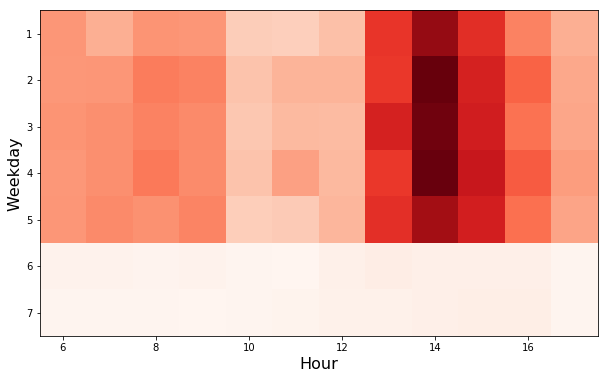

In [43]:
% matplotlib inline
from matplotlib import pyplot as plt
vls= newsData[['PublishedWeekDay', 'PublishedHour','Title']]. \
   groupby(['PublishedWeekDay', 'PublishedHour']).count(). \
    unstack()
    
fig, ax1 = plt.subplots(1,1, figsize=(10,12))

ax1.imshow(vls, cmap='Reds',interpolation='nearest')  
ax1.set_xticklabels(['',6,8,10,12,14,16])
ax1.set_yticklabels(['',1,2,3,4,5,6,7])
ax1.set_xlabel('Hour', fontsize=16)
ax1.set_ylabel('Weekday', fontsize=16)

In [15]:
whenPublished.to_excel(r'whenPublished.xlsx', index=False)

In [49]:
whenPublished1 = whenPublished.pivot(index='PublishedHour', columns='PublishedWeekDay', values='Title')
whenPublished1

PublishedWeekDay,0,1,2,3,4,5,6
PublishedHour,,,,,,,
6,1304,1384,1382,1371,1366,102,84
7,1111,1336,1399,1405,997,117,79
8,1374,1644,1570,1662,1396,86,82
9,1426,1636,1581,1578,1633,127,54
10,742,904,852,916,730,80,75
11,744,1043,1024,964,772,65,109
12,870,1010,975,982,972,175,144
13,2350,2385,2442,2381,2417,201,144
14,3151,3440,3400,3208,3116,180,180


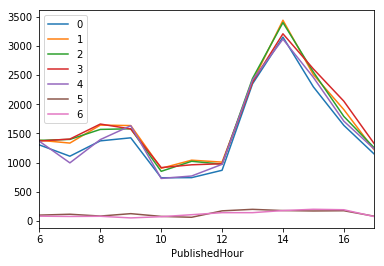

In [50]:
whenPublished1.plot()
plt.legend(loc='best')

In [56]:
dedupNews['PublishedYear'] = pd.to_datetime(dedupNews['PublishedDate']).dt.year

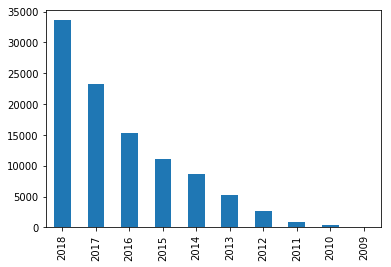

In [62]:
dedupNews['PublishedYear'].value_counts().plot.bar()

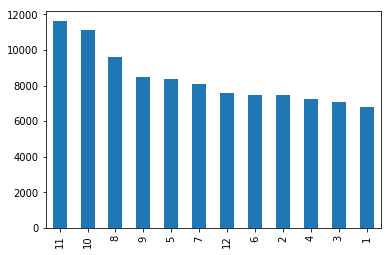

In [63]:
dedupNews['PublishedMonth'] = pd.to_datetime(dedupNews['PublishedDate']).dt.month
dedupNews['PublishedMonth'].value_counts().plot.bar()

In [68]:
yearMonth = dedupNews[['PublishedYear','PublishedMonth','Title']].groupby(['PublishedYear','PublishedMonth']).count().unstack()
yearMonth

Title                                                  \
PublishedMonth      1       2       3       4       5       6       7    
PublishedYear                                                            
2009               NaN     NaN     NaN     NaN     NaN     NaN     1.0   
2010               3.0    23.0    11.0    29.0    29.0    44.0    41.0   
2011              65.0    46.0    78.0    45.0    47.0    61.0    66.0   
2012             163.0   153.0   171.0   206.0   272.0   201.0   235.0   
2013             288.0   347.0   374.0   385.0   421.0   351.0   329.0   
2014             582.0   642.0   702.0   732.0   805.0   664.0   789.0   
2015             703.0   915.0   837.0   801.0   886.0   839.0   984.0   
2016            1016.0  1285.0  1133.0  1180.0  1204.0  1244.0  1254.0   
2017            1443.0  1684.0  1593.0  1559.0  2028.0  1676.0  1839.0   
2018            2563.0  2388.0  2202.0  2293.0  2703.0  2414.0  2547.0   

                                                        
PublishedMonth      8       9       10      11      12  
PublishedYear                                           
2009               NaN     NaN     6.0     4.0     4.0  
2010              42.0    48.0    60.0    56.0    53.0  
2011              66.0    54.0    63.0   106.0   154.0  
2012             223.0   206.0   289.0   282.0   264.0  
2013             557.0   537.0   602.0   546.0   517.0  
2014             782.0   715.0   892.0   700.0   658.0  
2015             979.0   902.0  1059.0  1166.0  1020.0  
2016            1590.0  1290.0  1378.0  1589.0  1146.0  
2017            2281.0  1765.0  2346.0  2890.0  2088.0  
2018            3099.0  2968.0  4436.0  4293.0  1665.0

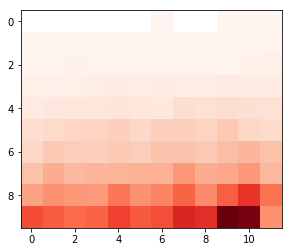

In [69]:
plt.imshow(yearMonth, cmap='Reds',interpolation='nearest')  

### 2. What happened on or after the day of news published
Since the price data is on day level, we can only compare previous close, open, close, close of upcoming days

In [71]:
import os 
os.chdir(r'C:\Users\Derrick\Documents\Scripts\Python\StockRelated\StockData')
path = os.getcwd()
dataFiles = os.listdir(path)


import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

dfList = []
for i in range(len(dataFiles)):
#for i in range(1):
    try:
        df = pd.read_csv(dataFiles[i])
        df = df[['date','open','close','adjClose']]
        df = df.sort_values(by='date')
        ticker = dataFiles[i].replace('.csv','')
        
        df['Adj-1'] = np.NaN
        df['Adj+1'] = np.NaN
        df['Adj+2'] = np.NaN
        df['Adj+3'] = np.NaN
        df['Adj+4'] = np.NaN
        df['Adj+5'] = np.NaN    
        df['Adj+6'] = np.NaN
        df['Adj+7'] = np.NaN
        df['Adj+8'] = np.NaN
        df['Adj+9'] = np.NaN
        df['Adj+10'] = np.NaN
        
        df['Adj-1'][1:len(df)] = df['adjClose'][0:len(df)-1]
        df['Adj+1'][0:len(df)-1] = df['adjClose'][1:len(df)]
        df['Adj+2'][0:len(df)-2] = df['adjClose'][2:len(df)]
        df['Adj+3'][0:len(df)-3] = df['adjClose'][3:len(df)]
        df['Adj+4'][0:len(df)-4] = df['adjClose'][4:len(df)]
        df['Adj+5'][0:len(df)-5] = df['adjClose'][5:len(df)]
        df['Adj+6'][0:len(df)-6] = df['adjClose'][6:len(df)]
        df['Adj+7'][0:len(df)-7] = df['adjClose'][7:len(df)]
        df['Adj+8'][0:len(df)-8] = df['adjClose'][8:len(df)]
        df['Adj+9'][0:len(df)-9] = df['adjClose'][9:len(df)]
        df['Adj+10'][0:len(df)-10] = df['adjClose'][10:len(df)]
        
        
        df['Adj'] = 1
        df['Adj-1'] = (df['Adj-1']/df['adjClose'])
        df['Adj+1'] = (df['Adj+1']/df['adjClose'])
        df['Adj+2'] = (df['Adj+2']/df['adjClose'])
        df['Adj+3'] = (df['Adj+3']/df['adjClose'])
        df['Adj+4'] = (df['Adj+4']/df['adjClose'])
        df['Adj+5'] = (df['Adj+5']/df['adjClose'])
        df['Adj+6'] = (df['Adj+6']/df['adjClose'])
        df['Adj+7'] = (df['Adj+7']/df['adjClose'])
        df['Adj+8'] = (df['Adj+8']/df['adjClose'])
        df['Adj+9'] = (df['Adj+9']/df['adjClose'])
        df['Adj+10'] = (df['Adj+10']/df['adjClose'])
        
        df['symbol'] = ticker
        
        df = df[['symbol','date','adjClose','Adj-1','Adj','Adj+1',
                'Adj+2','Adj+3','Adj+4','Adj+5',
                'Adj+6','Adj+7','Adj+8','Adj+9','Adj+10']]
        dfList.append(df)
        
    except:
        print(dataFiles[i], 'error')

CREXW.csv error


In [72]:
len(dfList)

632

In [73]:
price = pd.concat(dfList, axis=0)

In [76]:
price.head()

,symbol,date,adjClose,Adj-1,Adj,Adj+1,Adj+2,Adj+3,Adj+4,Adj+5,Adj+6,Adj+7,Adj+8,Adj+9,Adj+10
0,AABA,1998-01-02,4.1406,NaN,1,0.950031,0.966044,0.963170,0.969811,0.934043,0.943414,0.992924,1.011327,0.986282,0.984906
1,AABA,1998-01-05,3.9337,1.052597,1,1.016854,1.013829,1.020820,0.983171,0.993035,1.045148,1.064519,1.038157,1.036708,1.024811
2,AABA,1998-01-06,4.0000,0.983425,1,0.997025,1.003900,0.966875,0.976575,1.027825,1.046875,1.020950,1.019525,1.007825,0.998125
3,AABA,1998-01-07,3.9881,1.002984,1,1.006896,0.969760,0.979489,1.030892,1.049999,1.023996,1.022567,1.010832,1.001103,0.976505
4,AABA,1998-01-08,4.0156,0.993152,1,0.963119,0.972781,1.023832,1.042808,1.016984,1.015564,1.003910,0.994247,0.969818,0.961102


In [77]:
len(price)

1967993

In [79]:
price.iloc[168]

symbol            AABA
date        1998-09-02
adjClose        9.7188
Adj-1         0.929261
Adj                  1
Adj+1         0.967064
Adj+2         0.969513
Adj+3          1.08848
Adj+4          1.02893
Adj+5          1.02739
Adj+6          1.02739
Adj+7          1.07884
Adj+8          1.08527
Adj+9          1.20102
Adj+10         1.15832
Name: 168, dtype: object

In [ ]:
price.to_csv(r'F:\SR\MarketReaction\Price.csv', index=False)